# 04 - Visualizações e Análise Exploratória (Destino Final)

## Objetivo

Este notebook apresenta as **visualizações e análises exploratórias** dos dados finais da camada **Gold**, que representam o destino final do pipeline de dados.

As visualizações permitem:
- Compreender padrões e tendências nos dados
- Identificar relações entre variáveis
- Gerar insights sobre o dataset de filmes
- Apresentar resultados de forma clara e profissional

---

## Ferramentas Utilizadas

- **pandas**: Manipulação de dados
- **matplotlib**: Visualizações básicas
- **seaborn**: Visualizações estatísticas avançadas
- **numpy**: Operações numéricas


## 1. Importação de Bibliotecas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

warnings.filterwarnings('ignore')

# Configuração de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Bibliotecas importadas com sucesso!")


✅ Bibliotecas importadas com sucesso!


## 2. Carregamento dos Dados da Camada Gold


In [2]:
# Caminho da camada Gold
GOLD_PATH = "../dados/gold/"

# Carregar dados finais (usando Parquet para melhor performance)
print("📥 Carregando dados da camada Gold...")
df = pd.read_parquet(os.path.join(GOLD_PATH, "movies_final.parquet"))

print(f"✅ Dados carregados com sucesso!")
print(f"📊 Shape: {df.shape}")
print(f"\n📋 Colunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col}")

print(f"\n📈 Primeiras linhas:")
df.head()


📥 Carregando dados da camada Gold...
✅ Dados carregados com sucesso!
📊 Shape: (8931, 11)

📋 Colunas disponíveis:
   1. id
   2. title
   3. runtime
   4. vote_average
   5. vote_count
   6. original_language
   7. year
   8. id_genre
   9. genre_name
   10. director
   11. main_actor

📈 Primeiras linhas:


,id,title,runtime,vote_average,vote_count,original_language,year,id_genre,genre_name,director,main_actor
0,862,Toy Story,81.0,7.7,5415.0,en,1995,"16, 35, 10751","Animation, Comedy, Family",John Lasseter,Tom Hanks
1,8844,Jumanji,104.0,6.9,2413.0,en,1995,"12, 14, 10751","Adventure, Fantasy, Family",Joe Johnston,Robin Williams
2,15602,Grumpier Old Men,101.0,6.5,92.0,en,1995,"10749, 35","Romance, Comedy",Howard Deutch,Walter Matthau
3,11862,Father of the Bride Part II,106.0,5.7,173.0,en,1995,35,Comedy,Charles Shyer,Steve Martin
4,949,Heat,170.0,7.7,1886.0,en,1995,"28, 80, 18, 53","Action, Crime, Drama, Thriller",Michael Mann,Al Pacino


## 3. Estatísticas Descritivas


In [3]:
print("=" * 70)
print("📊 ESTATÍSTICAS DESCRITIVAS DO DATASET")
print("=" * 70)

print(f"\n🔢 Total de filmes: {len(df):,}")
print(f"📅 Período: {df['year'].min()} - {df['year'].max()}")
print(f"🌍 Idiomas únicos: {df['original_language'].nunique()}")

print("\n📈 Estatísticas das variáveis numéricas:")
numeric_cols = ['runtime', 'vote_average', 'vote_count', 'year']
df[numeric_cols].describe()


📊 ESTATÍSTICAS DESCRITIVAS DO DATASET

🔢 Total de filmes: 8,931
📅 Período: 1915 - 2017
🌍 Idiomas únicos: 41

📈 Estatísticas das variáveis numéricas:


,runtime,vote_average,vote_count,year
count,8931.000000,8931.000000,8931.000000,8931.000000
mean,106.125070,6.347856,513.261001,2000.115665
std,20.631783,0.878833,1012.480209,16.555467
min,60.000000,2.000000,50.000000,1915.000000
25%,93.000000,5.800000,82.000000,1994.000000
50%,102.000000,6.400000,162.000000,2006.000000
75%,115.000000,7.000000,442.500000,2012.000000
max,292.000000,9.100000,14075.000000,2017.000000


## 4. Visualização 1: Distribuição de Notas (vote_average)


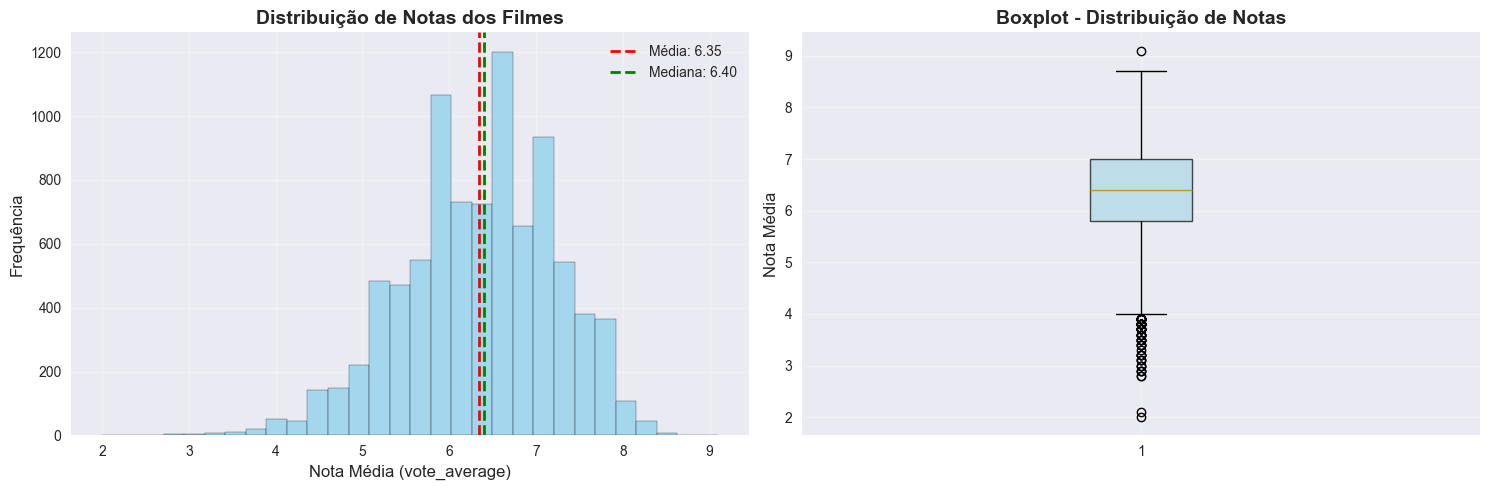

📊 Estatísticas da Nota Média:
   • Média: 6.35
   • Mediana: 6.40
   • Desvio Padrão: 0.88
   • Mínimo: 2.00
   • Máximo: 9.10


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(df['vote_average'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['vote_average'].mean(), color='red', linestyle='--', linewidth=2, label=f'Média: {df["vote_average"].mean():.2f}')
axes[0].axvline(df['vote_average'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {df["vote_average"].median():.2f}')
axes[0].set_xlabel('Nota Média (vote_average)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_title('Distribuição de Notas dos Filmes', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df['vote_average'], vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_ylabel('Nota Média', fontsize=12)
axes[1].set_title('Boxplot - Distribuição de Notas', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Estatísticas da Nota Média:")
print(f"   • Média: {df['vote_average'].mean():.2f}")
print(f"   • Mediana: {df['vote_average'].median():.2f}")
print(f"   • Desvio Padrão: {df['vote_average'].std():.2f}")
print(f"   • Mínimo: {df['vote_average'].min():.2f}")
print(f"   • Máximo: {df['vote_average'].max():.2f}")


## 5. Visualização 2: Top 10 Gêneros Mais Comuns


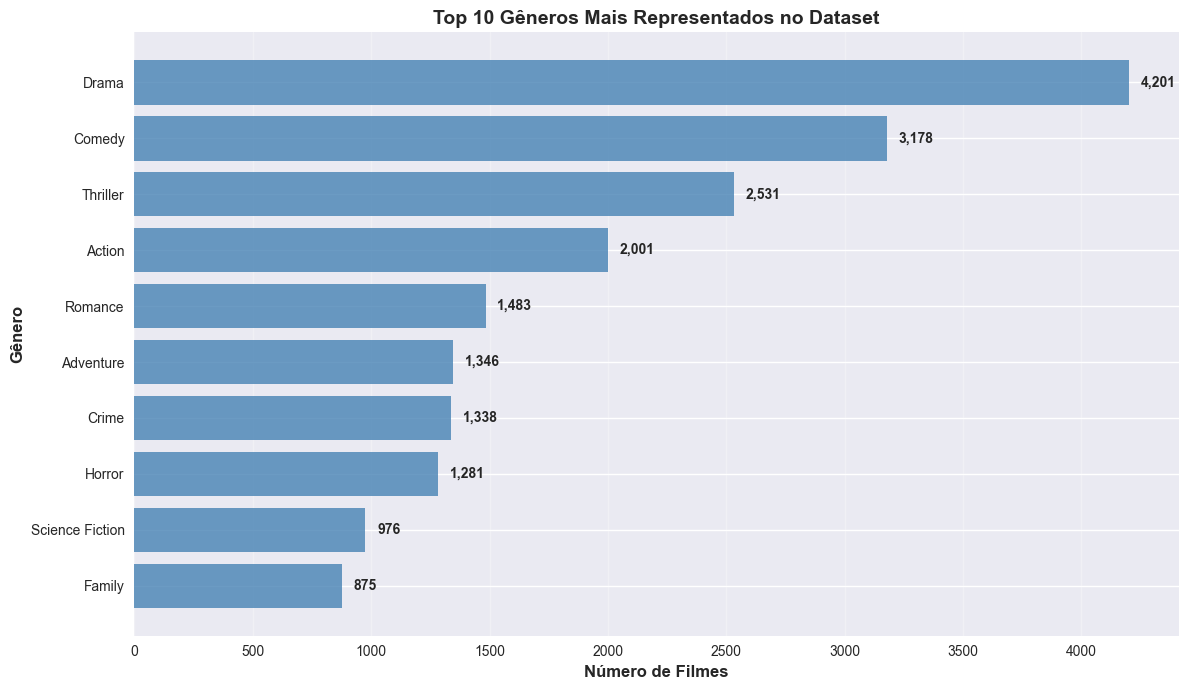

🎬 Top 10 Gêneros:
   1. Drama: 4,201 filmes
   2. Comedy: 3,178 filmes
   3. Thriller: 2,531 filmes
   4. Action: 2,001 filmes
   5. Romance: 1,483 filmes
   6. Adventure: 1,346 filmes
   7. Crime: 1,338 filmes
   8. Horror: 1,281 filmes
   9. Science Fiction: 976 filmes
   10. Family: 875 filmes


In [5]:
# Expandir gêneros (filmes podem ter múltiplos gêneros)
genres_series = df['genre_name'].str.split(', ').explode()

# Contar frequência de cada gênero
genre_counts = genres_series.value_counts().head(10)

# Criar visualização
plt.figure(figsize=(12, 7))
bars = plt.barh(range(len(genre_counts)), genre_counts.values, color='steelblue', alpha=0.8)

# Adicionar valores nas barras
for i, (bar, value) in enumerate(zip(bars, genre_counts.values)):
    plt.text(value + 50, bar.get_y() + bar.get_height()/2, 
             f'{value:,}', va='center', fontsize=10, fontweight='bold')

plt.yticks(range(len(genre_counts)), genre_counts.index)
plt.xlabel('Número de Filmes', fontsize=12, fontweight='bold')
plt.ylabel('Gênero', fontsize=12, fontweight='bold')
plt.title('Top 10 Gêneros Mais Representados no Dataset', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("🎬 Top 10 Gêneros:")
for i, (genre, count) in enumerate(genre_counts.items(), 1):
    print(f"   {i}. {genre}: {count:,} filmes")


## 6. Visualização 3: Filmes por Década


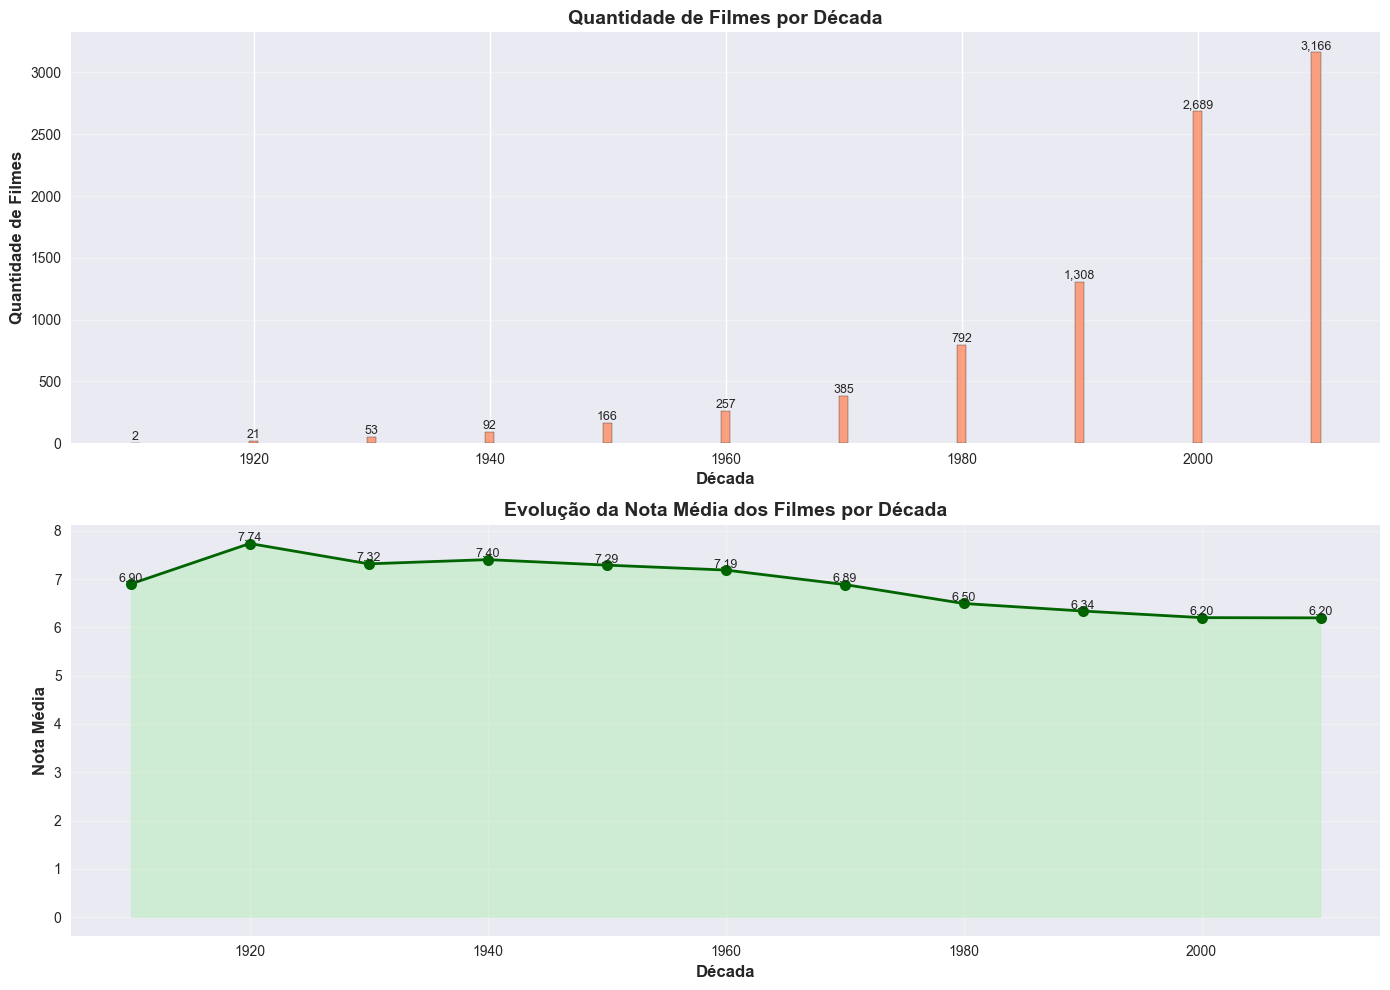

📅 Resumo por Década:
   1910s: 2 filmes | Nota média: 6.90
   1920s: 21 filmes | Nota média: 7.74
   1930s: 53 filmes | Nota média: 7.32
   1940s: 92 filmes | Nota média: 7.40
   1950s: 166 filmes | Nota média: 7.29
   1960s: 257 filmes | Nota média: 7.19
   1970s: 385 filmes | Nota média: 6.89
   1980s: 792 filmes | Nota média: 6.50
   1990s: 1,308 filmes | Nota média: 6.34
   2000s: 2,689 filmes | Nota média: 6.20
   2010s: 3,166 filmes | Nota média: 6.20


In [6]:
# Criar coluna de década
df['decade'] = (df['year'] // 10) * 10
decade_counts = df['decade'].value_counts().sort_index()

# Calcular nota média por década
decade_ratings = df.groupby('decade')['vote_average'].mean()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico 1: Quantidade de filmes por década
bars = axes[0].bar(decade_counts.index, decade_counts.values, 
                   color='coral', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Década', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Quantidade de Filmes', fontsize=12, fontweight='bold')
axes[0].set_title('Quantidade de Filmes por Década', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, decade_counts.values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{value:,}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Nota média por década
axes[1].plot(decade_ratings.index, decade_ratings.values, 
            marker='o', linewidth=2, markersize=8, color='darkgreen')
axes[1].fill_between(decade_ratings.index, decade_ratings.values, 
                     alpha=0.3, color='lightgreen')
axes[1].set_xlabel('Década', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Nota Média', fontsize=12, fontweight='bold')
axes[1].set_title('Evolução da Nota Média dos Filmes por Década', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Adicionar valores nos pontos
for x, y in zip(decade_ratings.index, decade_ratings.values):
    axes[1].text(x, y + 0.05, f'{y:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("📅 Resumo por Década:")
for decade in sorted(decade_counts.index):
    count = decade_counts[decade]
    rating = decade_ratings[decade]
    print(f"   {decade}s: {count:,} filmes | Nota média: {rating:.2f}")


## 7. Visualização 4: Matriz de Correlação


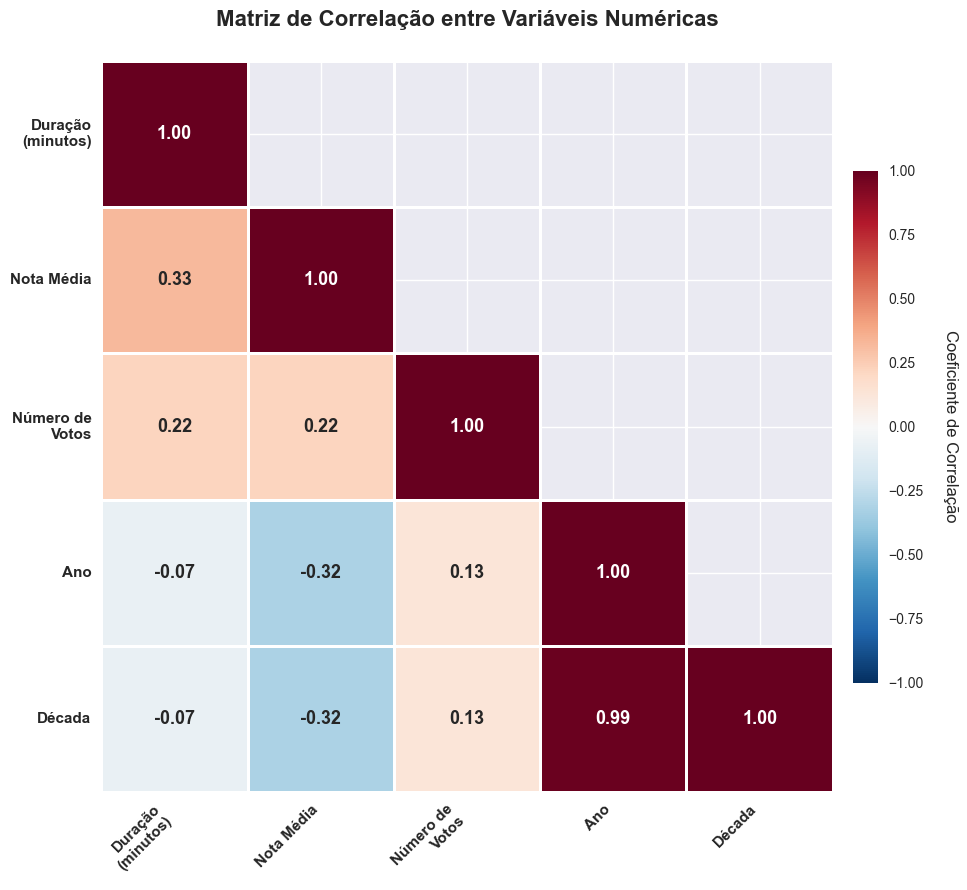

🔗 CORRELAÇÕES COM NOTA MÉDIA (vote_average)

Ordem de correlação (maior para menor):
   2. Duração
(minutos)   : +0.325 (🟡 Fraca, positiva)
   3. Número de
Votos     : +0.222 (🟡 Fraca, positiva)
   4. Década              : -0.316 (🟡 Fraca, negativa)
   5. Ano                 : -0.319 (🟡 Fraca, negativa)

💡 Interpretação:
   • Valores próximos de +1: correlação positiva forte
   • Valores próximos de -1: correlação negativa forte
   • Valores próximos de 0: pouca ou nenhuma correlação linear


In [13]:
# Selecionar apenas variáveis numéricas para correlação
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['id'])
correlation_matrix = numeric_df.corr()

# Preparar labels mais amigáveis
label_mapping = {
    'runtime': 'Duração\n(minutos)',
    'vote_average': 'Nota Média',
    'vote_count': 'Número de\nVotos',
    'year': 'Ano',
    'decade': 'Década'
}

# Renomear colunas e índices
correlation_matrix_renamed = correlation_matrix.rename(
    columns=label_mapping,
    index=label_mapping
)

# Criar figura maior e mais clara
plt.figure(figsize=(11, 9))

# Criar máscara para o triângulo superior (ocultar diagonal duplicada)
mask = np.triu(np.ones_like(correlation_matrix_renamed, dtype=bool), k=1)

# Heatmap melhorado
ax = sns.heatmap(
    correlation_matrix_renamed, 
    annot=True, 
    fmt='.2f', 
    cmap='RdBu_r',  # Esquema de cores invertido para melhor contraste
    center=0,
    square=True, 
    linewidths=2,
    linecolor='white',
    cbar_kws={
        "shrink": 0.7,
        "aspect": 20,
        "pad": 0.02
    },
    mask=mask,
    vmin=-1, 
    vmax=1,
    annot_kws={'size': 13, 'weight': 'bold'}  # Anotações maiores e em negrito
)

# Ajustar label da colorbar
cbar = ax.collections[0].colorbar
cbar.set_label("Coeficiente de Correlação", fontsize=12, rotation=270, labelpad=25)

plt.title('Matriz de Correlação entre Variáveis Numéricas', 
          fontsize=16, fontweight='bold', pad=25)
plt.xticks(rotation=45, ha='right', fontsize=11, fontweight='bold')
plt.yticks(rotation=0, fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

print("=" * 70)
print("🔗 CORRELAÇÕES COM NOTA MÉDIA (vote_average)")
print("=" * 70)
corr_with_rating = correlation_matrix['vote_average'].sort_values(ascending=False)
print("\nOrdem de correlação (maior para menor):")
for i, (var, corr) in enumerate(corr_with_rating.items(), 1):
    if var != 'vote_average':
        var_name = label_mapping.get(var, var)
        # Classificar força da correlação
        if abs(corr) >= 0.7:
            strength = "🔴 Forte"
        elif abs(corr) >= 0.4:
            strength = "🟠 Moderada"
        elif abs(corr) >= 0.2:
            strength = "🟡 Fraca"
        else:
            strength = "⚪ Muito Fraca"
        
        direction = "positiva" if corr > 0 else "negativa"
        print(f"   {i}. {var_name:20s}: {corr:+.3f} ({strength}, {direction})")

print("\n💡 Interpretação:")
print("   • Valores próximos de +1: correlação positiva forte")
print("   • Valores próximos de -1: correlação negativa forte")
print("   • Valores próximos de 0: pouca ou nenhuma correlação linear")


## 8. Visualização 5: Distribuição de Runtime (Duração)


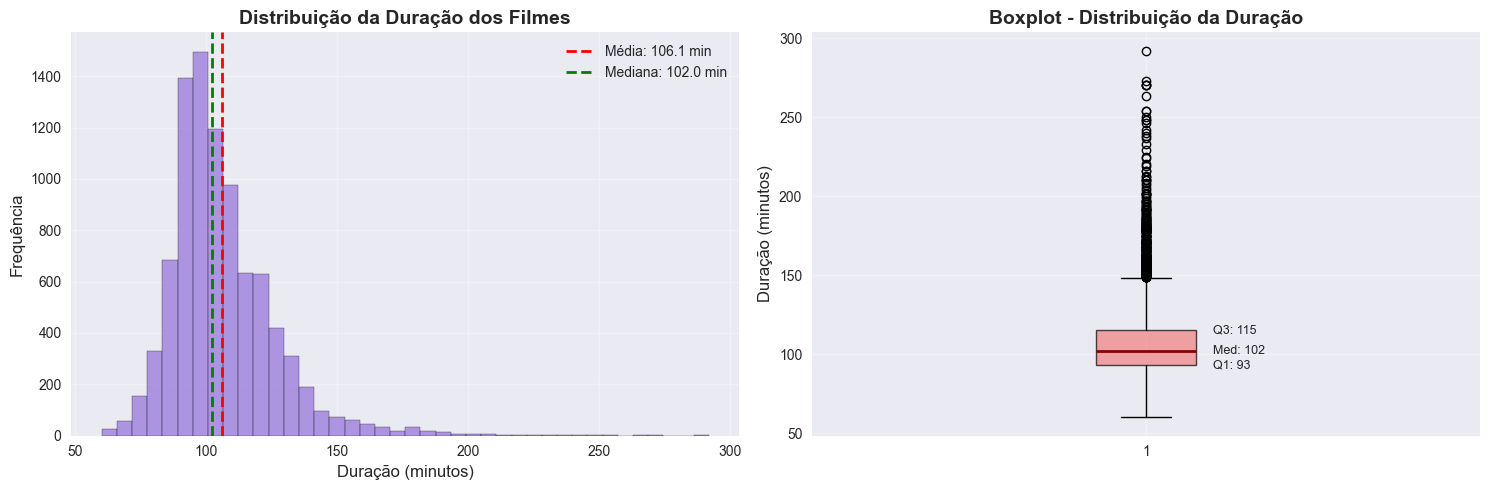

⏱️  Estatísticas de Duração:
   • Média: 106.1 minutos
   • Mediana: 102.0 minutos
   • Filme mais curto: 60 minutos
   • Filme mais longo: 292 minutos


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(df['runtime'], bins=40, color='mediumpurple', edgecolor='black', alpha=0.7)
axes[0].axvline(df['runtime'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Média: {df["runtime"].mean():.1f} min')
axes[0].axvline(df['runtime'].median(), color='green', linestyle='--', linewidth=2, 
                label=f'Mediana: {df["runtime"].median():.1f} min')
axes[0].set_xlabel('Duração (minutos)', fontsize=12)
axes[0].set_ylabel('Frequência', fontsize=12)
axes[0].set_title('Distribuição da Duração dos Filmes', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
bp = axes[1].boxplot(df['runtime'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='darkred', linewidth=2))
axes[1].set_ylabel('Duração (minutos)', fontsize=12)
axes[1].set_title('Boxplot - Distribuição da Duração', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Adicionar estatísticas no boxplot
stats = df['runtime'].describe()
axes[1].text(1.1, stats['25%'], f"Q1: {stats['25%']:.0f}", va='center', fontsize=9)
axes[1].text(1.1, stats['50%'], f"Med: {stats['50%']:.0f}", va='center', fontsize=9)  # 50% é a mediana
axes[1].text(1.1, stats['75%'], f"Q3: {stats['75%']:.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"⏱️  Estatísticas de Duração:")
print(f"   • Média: {df['runtime'].mean():.1f} minutos")
print(f"   • Mediana: {df['runtime'].median():.1f} minutos")
print(f"   • Filme mais curto: {df['runtime'].min():.0f} minutos")
print(f"   • Filme mais longo: {df['runtime'].max():.0f} minutos")


## 9. Visualização 6: Top 10 Diretores com Mais Filmes


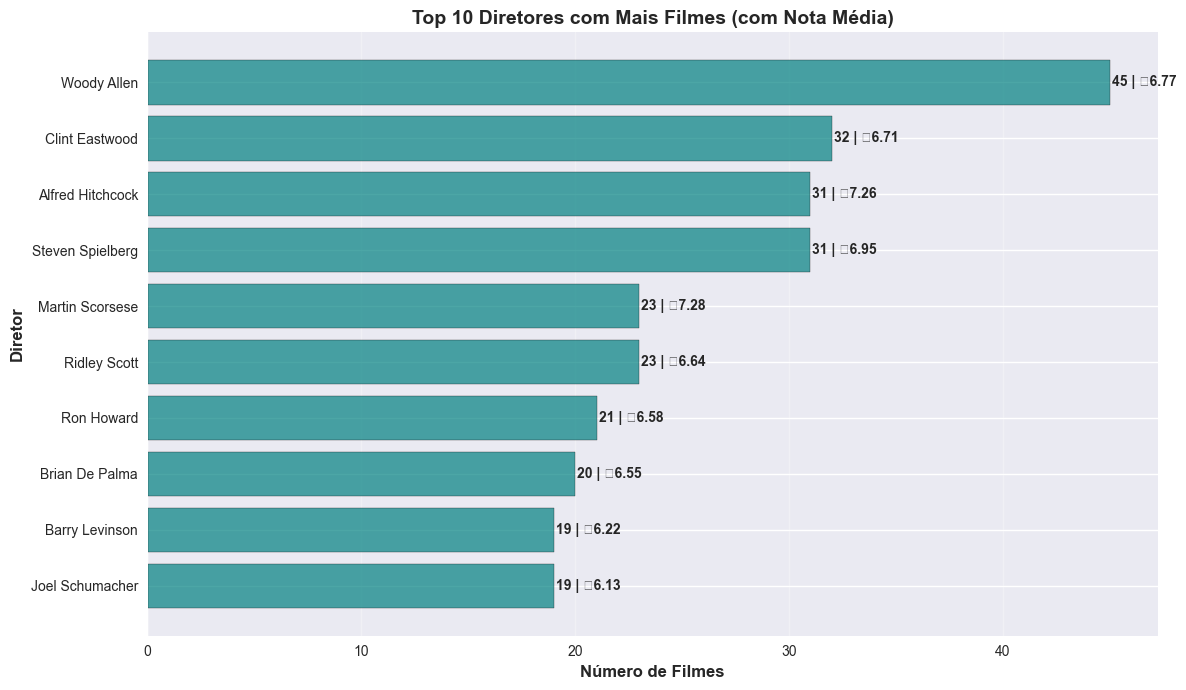

🎬 Top 10 Diretores:
   1. Woody Allen: 45 filmes | Nota média: 6.77
   2. Clint Eastwood: 32 filmes | Nota média: 6.71
   3. Alfred Hitchcock: 31 filmes | Nota média: 7.26
   4. Steven Spielberg: 31 filmes | Nota média: 6.95
   5. Martin Scorsese: 23 filmes | Nota média: 7.28
   6. Ridley Scott: 23 filmes | Nota média: 6.64
   7. Ron Howard: 21 filmes | Nota média: 6.58
   8. Brian De Palma: 20 filmes | Nota média: 6.55
   9. Barry Levinson: 19 filmes | Nota média: 6.22
   10. Joel Schumacher: 19 filmes | Nota média: 6.13


In [9]:
# Contar filmes por diretor e calcular nota média
director_stats = df.groupby('director').agg({
    'id': 'count',
    'vote_average': 'mean'
}).rename(columns={'id': 'num_filmes', 'vote_average': 'nota_media'})

# Top 10 diretores com mais filmes
top_directors = director_stats.nlargest(10, 'num_filmes')

# Criar visualização
fig, ax = plt.subplots(figsize=(12, 7))
x_pos = range(len(top_directors))
bars = ax.barh(x_pos, top_directors['num_filmes'], 
               color='teal', alpha=0.7, edgecolor='black')

# Adicionar valores nas barras
for i, (bar, count, rating) in enumerate(zip(bars, top_directors['num_filmes'], top_directors['nota_media'])):
    ax.text(count + 0.1, bar.get_y() + bar.get_height()/2,
           f'{count:.0f} | ⭐{rating:.2f}', va='center', fontsize=10, fontweight='bold')

ax.set_yticks(x_pos)
ax.set_yticklabels(top_directors.index, fontsize=10)
ax.set_xlabel('Número de Filmes', fontsize=12, fontweight='bold')
ax.set_ylabel('Diretor', fontsize=12, fontweight='bold')
ax.set_title('Top 10 Diretores com Mais Filmes (com Nota Média)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("🎬 Top 10 Diretores:")
for i, (director, row) in enumerate(top_directors.iterrows(), 1):
    print(f"   {i}. {director}: {int(row['num_filmes'])} filmes | Nota média: {row['nota_media']:.2f}")


## 10. Visualização 7: Relação entre Runtime e Nota Média


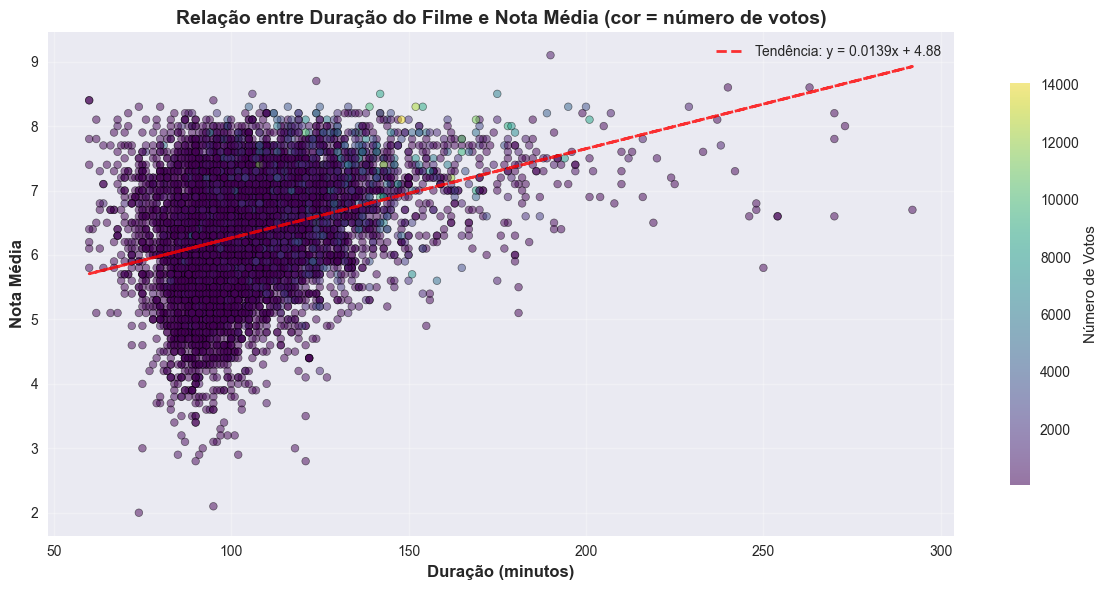

🔗 Correlação entre Runtime e Nota Média: 0.325
   → Correlação moderada


In [10]:
plt.figure(figsize=(12, 6))

# Scatter plot com densidade
scatter = plt.scatter(df['runtime'], df['vote_average'], 
                     alpha=0.5, c=df['vote_count'], 
                     cmap='viridis', s=30, edgecolors='black', linewidth=0.5)

plt.xlabel('Duração (minutos)', fontsize=12, fontweight='bold')
plt.ylabel('Nota Média', fontsize=12, fontweight='bold')
plt.title('Relação entre Duração do Filme e Nota Média (cor = número de votos)', 
         fontsize=14, fontweight='bold')

# Adicionar linha de tendência
z = np.polyfit(df['runtime'], df['vote_average'], 1)
p = np.poly1d(z)
plt.plot(df['runtime'], p(df['runtime']), "r--", alpha=0.8, linewidth=2, 
         label=f'Tendência: y = {z[0]:.4f}x + {z[1]:.2f}')

plt.colorbar(scatter, label='Número de Votos', shrink=0.8)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

correlation = df[['runtime', 'vote_average']].corr().iloc[0, 1]
print(f"🔗 Correlação entre Runtime e Nota Média: {correlation:.3f}")
if abs(correlation) < 0.1:
    print("   → Correlação muito fraca (praticamente independentes)")
elif abs(correlation) < 0.3:
    print("   → Correlação fraca")
elif abs(correlation) < 0.7:
    print("   → Correlação moderada")
else:
    print("   → Correlação forte")


## 11. Visualização 8: Top 10 Idiomas Mais Comuns


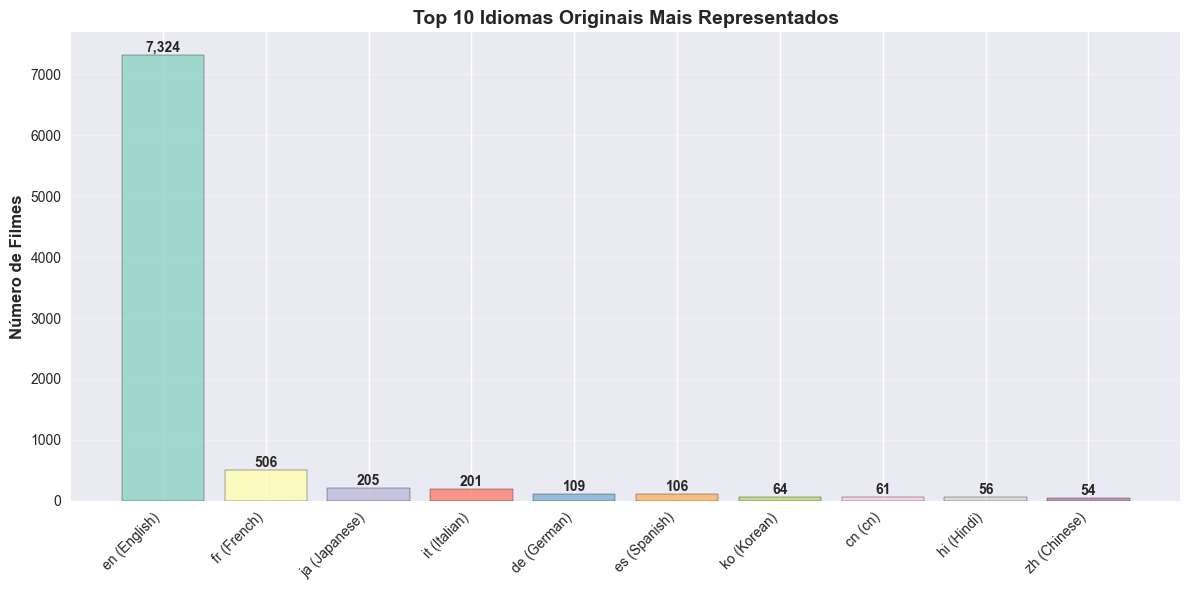

🌍 Top 10 Idiomas:
   1. English (en): 7,324 filmes
   2. French (fr): 506 filmes
   3. Japanese (ja): 205 filmes
   4. Italian (it): 201 filmes
   5. German (de): 109 filmes
   6. Spanish (es): 106 filmes
   7. Korean (ko): 64 filmes
   8. cn (cn): 61 filmes
   9. Hindi (hi): 56 filmes
   10. Chinese (zh): 54 filmes


In [11]:
# Top 10 idiomas
top_languages = df['original_language'].value_counts().head(10)

# Mapear códigos de idioma para nomes (principais)
language_names = {
    'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'de': 'German',
    'it': 'Italian',
    'ja': 'Japanese',
    'ru': 'Russian',
    'zh': 'Chinese',
    'ko': 'Korean',
    'hi': 'Hindi'
}

# Criar visualização
plt.figure(figsize=(12, 6))
colors = plt.cm.Set3(range(len(top_languages)))
bars = plt.bar(range(len(top_languages)), top_languages.values, 
               color=colors, alpha=0.8, edgecolor='black')

# Adicionar valores nas barras
for bar, value in zip(bars, top_languages.values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{value:,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotular eixos
labels = [f"{lang} ({language_names.get(lang, lang)})" for lang in top_languages.index]
plt.xticks(range(len(top_languages)), labels, rotation=45, ha='right')
plt.ylabel('Número de Filmes', fontsize=12, fontweight='bold')
plt.title('Top 10 Idiomas Originais Mais Representados', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("🌍 Top 10 Idiomas:")
for i, (lang, count) in enumerate(top_languages.items(), 1):
    lang_name = language_names.get(lang, lang)
    print(f"   {i}. {lang_name} ({lang}): {count:,} filmes")


## 12. Insights e Análises Principais


In [12]:
print("=" * 70)
print("💡 INSIGHTS E ANÁLISES PRINCIPAIS")
print("=" * 70)

print("\n📊 1. CARACTERÍSTICAS GERAIS DO DATASET:")
print(f"   • Total de filmes analisados: {len(df):,}")
print(f"   • Período coberto: {df['year'].min()} - {df['year'].max()} ({df['year'].max() - df['year'].min()} anos)")
print(f"   • Nota média geral: {df['vote_average'].mean():.2f}/10")
print(f"   • Duração média: {df['runtime'].mean():.1f} minutos")

print("\n🎬 2. GÊNEROS:")
top_genre = genres_series.value_counts().head(1).index[0]
print(f"   • Gênero mais comum: {top_genre}")
print(f"   • Número de gêneros únicos: {genres_series.nunique()}")

print("\n📅 3. TENDÊNCIAS TEMPORAIS:")
best_decade = decade_ratings.idxmax()
worst_decade = decade_ratings.idxmin()
print(f"   • Década com melhor nota média: {best_decade}s ({decade_ratings[best_decade]:.2f})")
print(f"   • Década com pior nota média: {worst_decade}s ({decade_ratings[worst_decade]:.2f})")
print(f"   • Década com mais filmes: {decade_counts.idxmax()}s ({decade_counts.max():,} filmes)")

print("\n🎭 4. DIREÇÃO E PRODUÇÃO:")
print(f"   • Número de diretores únicos: {df['director'].nunique():,}")
top_dir = director_stats.nlargest(1, 'num_filmes').index[0]
print(f"   • Diretor mais prolífico: {top_dir} ({int(director_stats.loc[top_dir, 'num_filmes'])} filmes)")

print("\n🌍 5. DIVERSIDADE:")
print(f"   • Idiomas únicos: {df['original_language'].nunique()}")
pct_english = (df['original_language'] == 'en').sum() / len(df) * 100
print(f"   • Percentual de filmes em inglês: {pct_english:.1f}%")

print("\n🔗 6. CORRELAÇÕES INTERESSANTES:")
print(f"   • Runtime vs Nota: {df[['runtime', 'vote_average']].corr().iloc[0,1]:.3f}")
print(f"   • Vote Count vs Nota: {df[['vote_count', 'vote_average']].corr().iloc[0,1]:.3f}")

print("\n" + "=" * 70)
print("✅ Análise exploratória concluída!")
print("=" * 70)


💡 INSIGHTS E ANÁLISES PRINCIPAIS

📊 1. CARACTERÍSTICAS GERAIS DO DATASET:
   • Total de filmes analisados: 8,931
   • Período coberto: 1915 - 2017 (102 anos)
   • Nota média geral: 6.35/10
   • Duração média: 106.1 minutos

🎬 2. GÊNEROS:
   • Gênero mais comum: Drama
   • Número de gêneros únicos: 20

📅 3. TENDÊNCIAS TEMPORAIS:
   • Década com melhor nota média: 1920s (7.74)
   • Década com pior nota média: 2010s (6.20)
   • Década com mais filmes: 2010s (3,166 filmes)

🎭 4. DIREÇÃO E PRODUÇÃO:
   • Número de diretores únicos: 3,692
   • Diretor mais prolífico: Woody Allen (45 filmes)

🌍 5. DIVERSIDADE:
   • Idiomas únicos: 41
   • Percentual de filmes em inglês: 82.0%

🔗 6. CORRELAÇÕES INTERESSANTES:
   • Runtime vs Nota: 0.325
   • Vote Count vs Nota: 0.222

✅ Análise exploratória concluída!


## 13. Conclusão das Visualizações

Este notebook apresentou uma análise exploratória completa dos dados finais da camada Gold, incluindo:

✅ **8 visualizações principais** cobrindo diferentes aspectos dos dados:
- Distribuição de notas
- Gêneros mais representados
- Análise temporal (décadas)
- Correlações entre variáveis
- Distribuição de duração
- Diretores mais prolíficos
- Relação runtime vs nota
- Idiomas originais

✅ **Insights gerados** que fornecem uma compreensão abrangente do dataset de filmes.

Os dados estão prontos para uso em análises mais avançadas, modelagem preditiva ou construção de dashboards interativos.
